In [297]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [298]:
df = pd.read_csv('../data/daily-total-female-births.csv')
df.head()

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [299]:
df['Date'] = pd.to_datetime(df['Date'])

In [300]:
df['Date']

0     1959-01-01
1     1959-01-02
2     1959-01-03
3     1959-01-04
4     1959-01-05
         ...    
360   1959-12-27
361   1959-12-28
362   1959-12-29
363   1959-12-30
364   1959-12-31
Name: Date, Length: 365, dtype: datetime64[ns]

In [301]:
df['lag_1'] = df['Births'].shift(1)
df['lag_2'] = df['Births'].shift(2)
df['lead_1'] = df['Births'].shift(-1)
df['Centered_MA'] = (df['Births'] + df['lead_1'] + df['lag_1'])/3
df['Trailing_MA'] = (df['Births'] + df['lag_1'] + df['lag_2'])/3

In [302]:
df

,Date,Births,lag_1,lag_2,lead_1,Centered_MA,Trailing_MA
0,1959-01-01,35,NaN,NaN,32.0,NaN,NaN
1,1959-01-02,32,35.0,NaN,30.0,32.333333,NaN
2,1959-01-03,30,32.0,35.0,31.0,31.000000,32.333333
3,1959-01-04,31,30.0,32.0,44.0,35.000000,31.000000
4,1959-01-05,44,31.0,30.0,29.0,34.666667,35.000000
...,...,...,...,...,...,...,...
360,1959-12-27,37,34.0,44.0,52.0,41.000000,38.333333
361,1959-12-28,52,37.0,34.0,48.0,45.666667,41.000000
362,1959-12-29,48,52.0,37.0,55.0,51.666667,45.666667
363,1959-12-30,55,48.0,52.0,50.0,51.000000,51.666667


In [303]:
display(df)

,Date,Births,lag_1,lag_2,lead_1,Centered_MA,Trailing_MA
0,1959-01-01,35,NaN,NaN,32.0,NaN,NaN
1,1959-01-02,32,35.0,NaN,30.0,32.333333,NaN
2,1959-01-03,30,32.0,35.0,31.0,31.000000,32.333333
3,1959-01-04,31,30.0,32.0,44.0,35.000000,31.000000
4,1959-01-05,44,31.0,30.0,29.0,34.666667,35.000000
...,...,...,...,...,...,...,...
360,1959-12-27,37,34.0,44.0,52.0,41.000000,38.333333
361,1959-12-28,52,37.0,34.0,48.0,45.666667,41.000000
362,1959-12-29,48,52.0,37.0,55.0,51.666667,45.666667
363,1959-12-30,55,48.0,52.0,50.0,51.000000,51.666667


f:\Vendors\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\Vendors\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\Vendors\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
f:\Vendors\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode

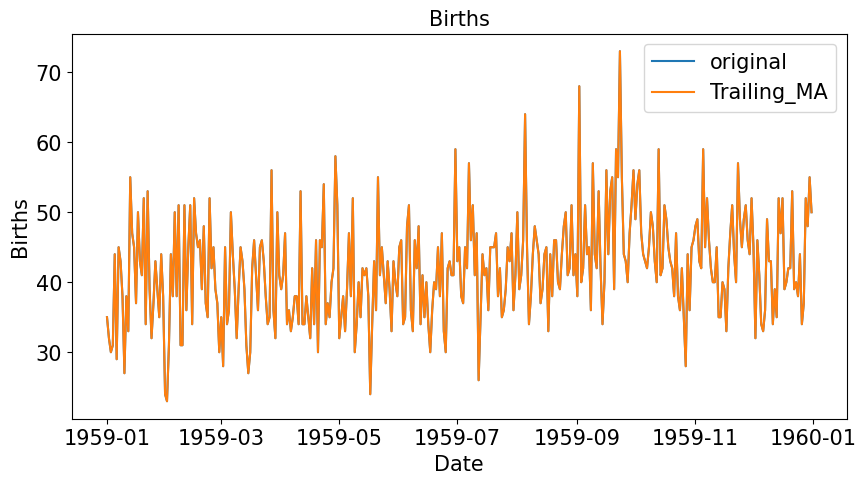

In [304]:
plt.figure(figsize=(10,5))
plt.title("Births", fontsize=15)
sns.lineplot(x='Date', y='Births', data=df, label='original')
# sns.lineplot(x='Month', y='Centered_MA', data=df, label='Centered_MA')
sns.lineplot(x='Date', y='Births', data=df, label='Trailing_MA')
plt.xticks(fontsize=15)
plt.xlabel('Date',fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Births',fontsize=15)
plt.legend(fontsize=15)

f:\Vendors\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\Vendors\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\Vendors\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
f:\Vendors\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode

Text(0.5, 1.0, '6-MA')

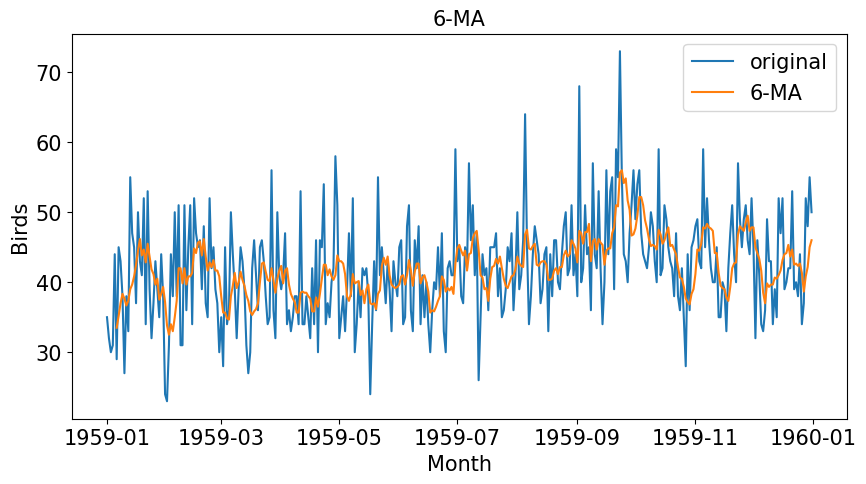

In [305]:
fig1 = plt.figure(figsize=(10,5))
df['Births_MA'] = df['Births'].rolling(window=6, center=False).mean()
sns.lineplot(x='Date', y='Births', data=df, label='original')
sns.lineplot(x='Date', y='Births_MA', data=df, label='6-MA')
plt.xlabel('Month',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Birds',fontsize=15)
plt.legend(fontsize=15)
plt.title('6-MA', fontsize=15)

f:\Vendors\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\Vendors\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\Vendors\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
f:\Vendors\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode

Text(0.5, 1.0, '12-MA')

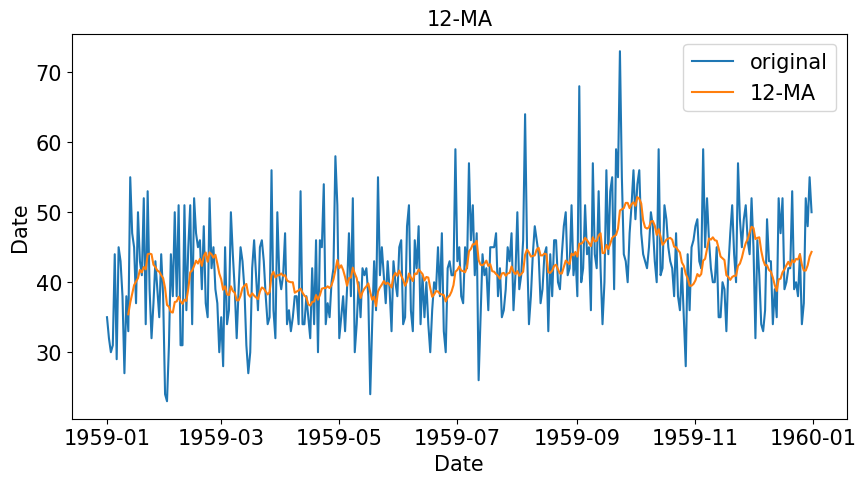

In [306]:
fig2 = plt.figure(figsize=(10,5))
df['Births_MA'] = df['Births'].rolling(window=12, center=False).mean()
sns.lineplot(x='Date', y='Births', data=df, label='original')
sns.lineplot(x='Date', y='Births_MA', data=df, label='12-MA')
plt.xlabel('Date',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Date',fontsize=15)
plt.legend(fontsize=15)
plt.title('12-MA', fontsize=15)

In [307]:
from statsmodels.api import tsa

In [308]:
def exponential_smoothing(Y, alpha):
    S = np.zeros(Y.shape[0])
    S[0] = Y[0]
    for t in range(1, Y.shape[0]):
        S[t] = alpha * Y[t] + (1- alpha) * S[t-1]
    return S

In [322]:
## dùng pandas
df['ExponentialSmoothing_PANDAS'] = df['Births'].ewm(alpha=0.3, adjust=False).mean()
## dùng functions
df['ExponentialSmoothing_FUNCTION'] = exponential_smoothing(df['Births'], 0.3)
## dùng tsa
es = tsa.SimpleExpSmoothing(df['Births'])
es.fit(smoothing_level=0.3)
df['ExponentialSmoothing_TSA'] = es.predict(es.params, start=1, end=df.shape[0])

C:\Users\duclh3\AppData\Roaming\Python\Python310\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [323]:
df

,Date,Births,lag_1,lag_2,lead_1,Centered_MA,Trailing_MA,Births_MA,ExponentialSmoothing_PANDAS,ExponentialSmoothing_FUNCTION,ExponentialSmoothing_TSA
0,1959-01-01,35,NaN,NaN,32.0,NaN,NaN,NaN,35.000000,35.000000,35.000000
1,1959-01-02,32,35.0,NaN,30.0,32.333333,NaN,NaN,34.100000,34.100000,34.100000
2,1959-01-03,30,32.0,35.0,31.0,31.000000,32.333333,NaN,32.870000,32.870000,32.870000
3,1959-01-04,31,30.0,32.0,44.0,35.000000,31.000000,NaN,32.309000,32.309000,32.309000
4,1959-01-05,44,31.0,30.0,29.0,34.666667,35.000000,NaN,35.816300,35.816300,35.816300
...,...,...,...,...,...,...,...,...,...,...,...
360,1959-12-27,37,34.0,44.0,52.0,41.000000,38.333333,41.666667,38.828280,38.828280,38.828280
361,1959-12-28,52,37.0,34.0,48.0,45.666667,41.000000,41.666667,42.779796,42.779796,42.779796
362,1959-12-29,48,52.0,37.0,55.0,51.666667,45.666667,42.416667,44.345857,44.345857,44.345857
363,1959-12-30,55,48.0,52.0,50.0,51.000000,51.666667,43.666667,47.542100,47.542100,47.542100


In [310]:
df.drop(columns=['lag_1', 'lag_2', 'lead_1', 'Centered_MA', 'Trailing_MA', 'Births_MA','ExponentialSmoothing'])

KeyError: "['ExponentialSmoothing'] not found in axis"

f:\Vendors\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\Vendors\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\Vendors\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
f:\Vendors\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode

Text(0.5, 1.0, 'Exponential Smoothing with alpha=0.3')

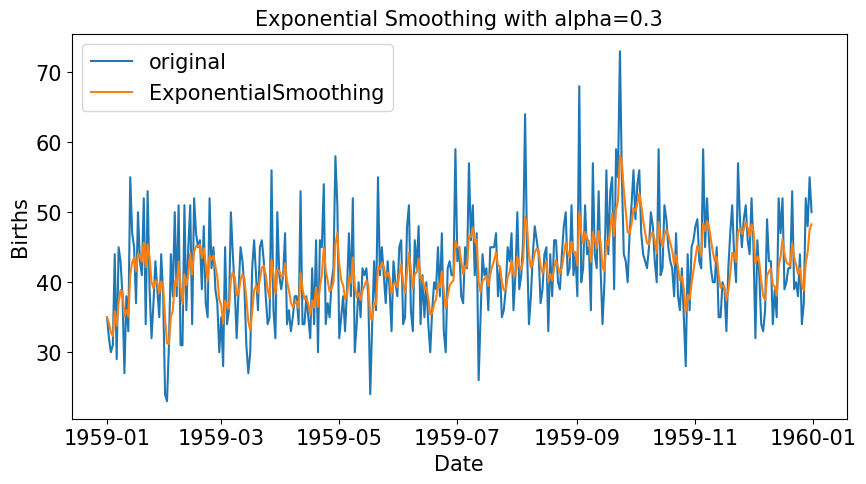

In [288]:
fig4= plt.figure(figsize=(10,5))
sns.lineplot(x='Date', y='Births', data=df, label='original')
sns.lineplot(x='Date', y='ExponentialSmoothing_PANDAS', data=df, label='ExponentialSmoothing')
plt.xlabel('Date',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Births',fontsize=15)
plt.legend(fontsize=15)
plt.title('Exponential Smoothing with alpha=0.3', fontsize=15)

In [254]:
es.predict(es.params, start=df.shape[0], end=df.shape[0] + 10)

array([30585.65995392, 30585.65995392, 30585.65995392, 30585.65995392,
       30585.65995392, 30585.65995392, 30585.65995392, 30585.65995392,
       30585.65995392, 30585.65995392, 30585.65995392])

In [248]:
df.shape[0]

336

In [293]:
es.predict(es.params, start=1, end=df.shape[0])

array([35.        , 34.1       , 32.87      , 32.309     , 35.8163    ,
       33.77141   , 37.139987  , 38.8979909 , 38.62859363, 35.14001554,
       35.99801088, 35.09860762, 41.06902533, 42.84831773, 43.49382241,
       41.54567569, 44.08197298, 43.75738109, 42.93016676, 45.65111673,
       42.15578171, 45.4090472 , 43.48633304, 40.04043313, 39.12830319,
       40.28981223, 39.90286856, 38.43200799, 40.1024056 , 39.47168392,
       34.83017874, 31.28112512, 31.19678758, 35.03775131, 35.92642592,
       40.14849814, 39.5039487 , 42.95276409, 39.36693486, 36.8568544 ,
       41.09979808, 39.56985866, 41.19890106, 44.13923074, 41.09746152,
       44.36822306, 45.15775614, 45.1104293 , 45.37730051, 43.46411036,
       44.82487725, 42.47741408, 40.23418985, 43.7639329 , 43.23475303,
       43.76432712, 42.33502898, 40.73452029, 37.5141642 , 36.75991494,
       34.13194046, 37.39235832, 36.37465082, 36.26225558, 40.3835789 ,
       41.46850523, 40.72795366, 38.10956756, 38.37669729, 40.36